## Regularization(Ridge, Lasso, ElasticNet) - Cross Validation - Gridsearch

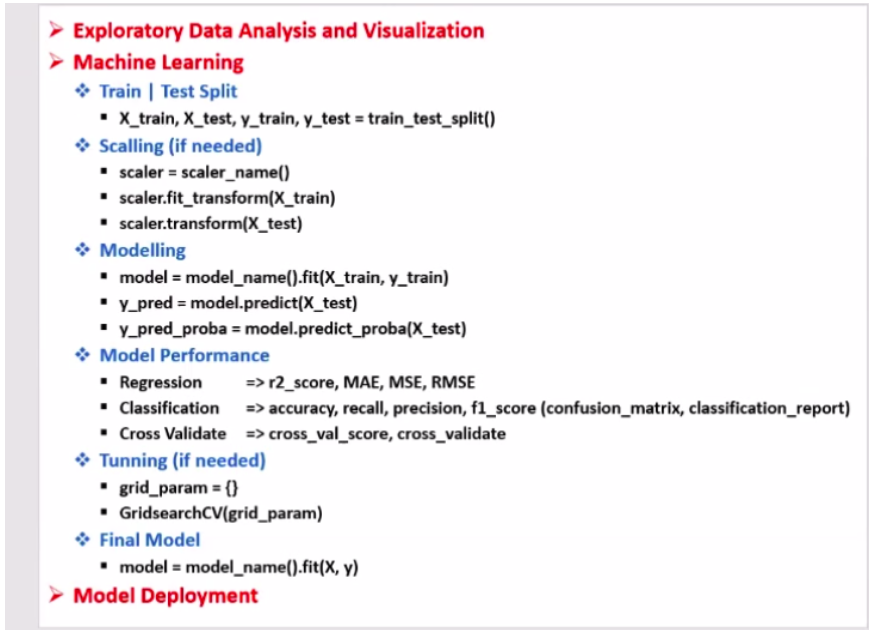

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop("sales", axis =1)

y = df["sales"]

## Polynomial Conversion

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
polynomial_converter = PolynomialFeatures(degree=5, include_bias=False)

In [16]:
poly_features = polynomial_converter.fit_transform(X)

In [17]:
poly_features.shape

(200, 55)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=101)

## Train | Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

NameError: name 'poly_features' is not defined

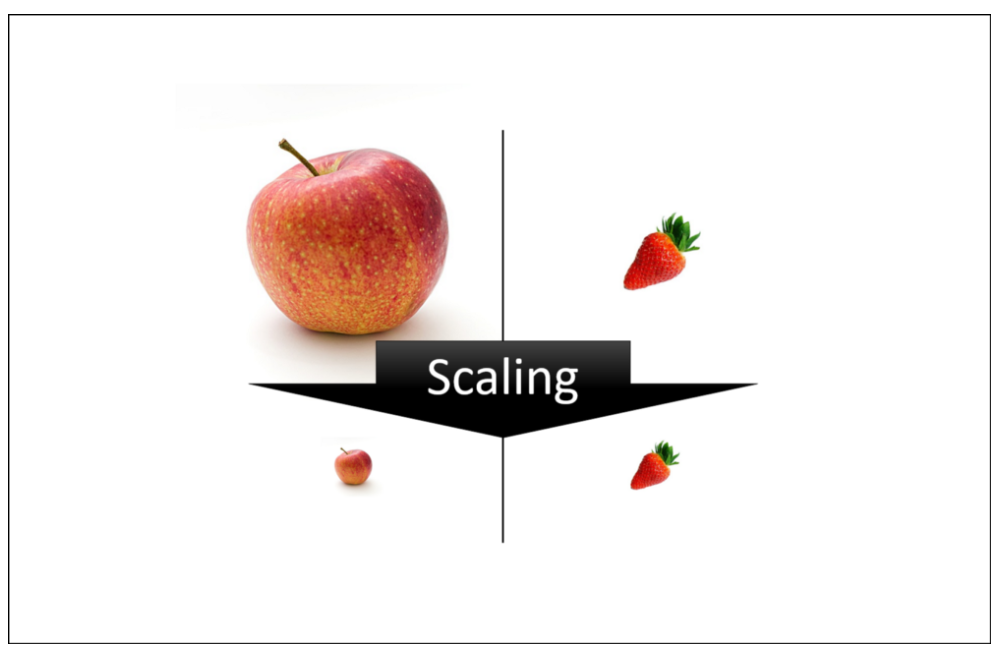

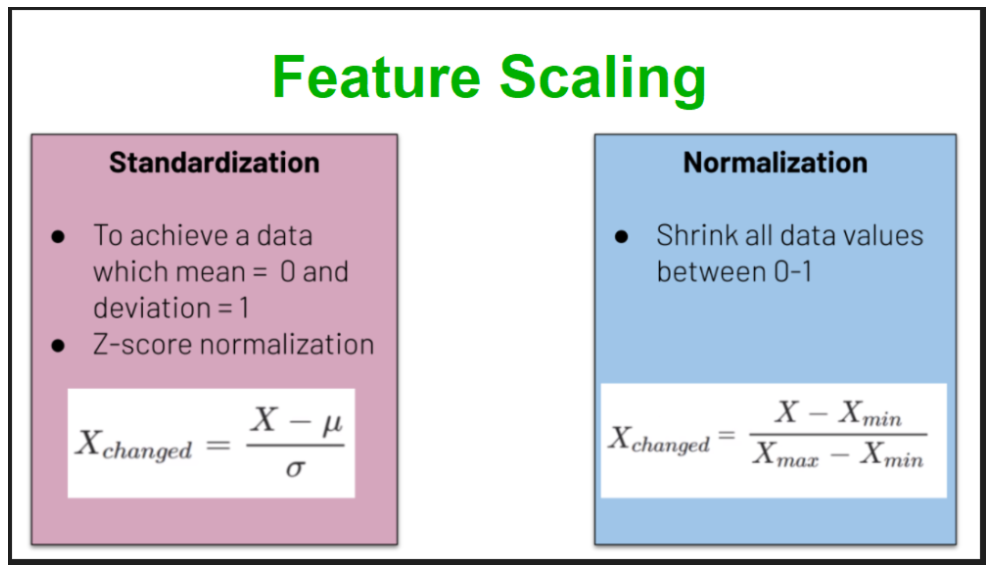

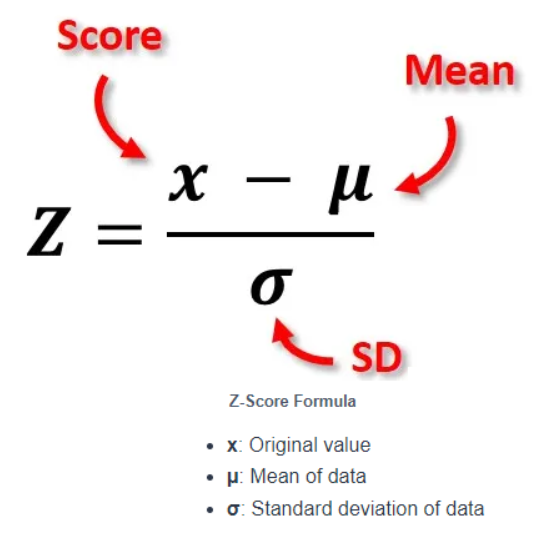

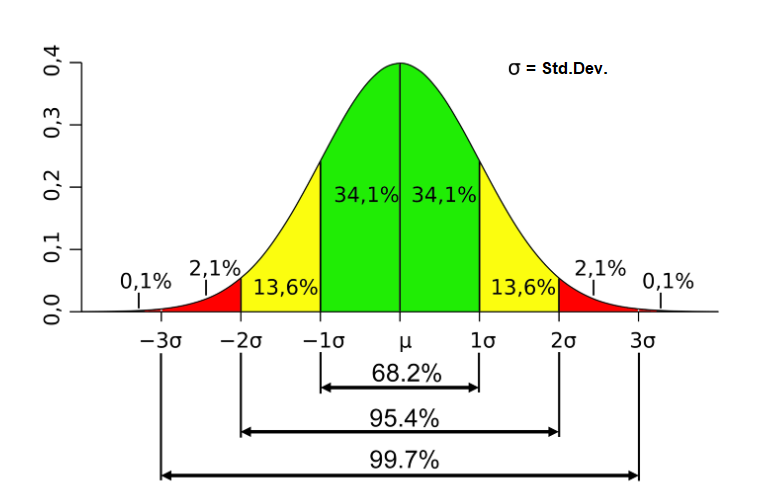

Bir matematik sınav sonuçlarının olduğu veri setimiz olduğunu düşünelim. Bu sınav sonucunda ortalamanın (μ) 60 olduğu ve standart sapmanın (σ) ise 10 olduğu tespit edilmiştir. Eğer 49 ve altında puan alan oranını bulmak istersek standardizasyon işlemi sonrası z-puan tablosunu kullanabiliriz.
z=(49-60)/10
z puanımız standardizasyon işlemi sonucunda -1.1 olarak bulundu. z -puan tablosuna bakıldığında toplam popülasyonun %13.57'sinin 49 ve daha altında puan aldığı tespit edilmiştir.

Standardizasyon işlemini Python’da StandartScaler fonksiyonu ile yapabiliriz.

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

#featureların önemini bulmak için scale yapmak önemli
# target e kesinlikle scale uygulanmaz. tereddüt varsa scale yapın
#test setine fit yapmiyoruz,sadece transform yapiyoruz

In [31]:
scaler.fit(X_train)

StandardScaler()

In [32]:
X_train_scaled = scaler.transform(X_train)         # bir üs satırda tutulan işlem bilgilerini x_tarin uygulayıp dönüştrüyoruz
X_train_scaled

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

Z-puanı, veri setindeki bir gözlemin ortalamadan kaç standart sapma uzaklıkta olduğunu gösterir.
Pozitif z-skoru, gözlemin ortalamadan büyük olduğunu,
Negatif z-skoru, gözlemin ortalamadan küçük olduğunu,
Z-skorunun sıfır olması ise gözlemin ortalamaya eşit olduğunu ifade eder.

Z dağılımı olarak da isimlendirilen standart normal dağılım, ortalamanın 0, standart sapmanın da 1’e eşit olduğu özel bir normal dağılımdır. Standart normal dağılım, z-puanı adı verilen standartlaştırılmış değerlerin normal dağılımıdır. Z-puanı standart sapma birimleriyle ölçülür.
11:02
Herhangi bir normal dağılım, verilerin standartlaştırılması ile z-dağılımına dönüştürülebilir. Verinin standartlaştırılması, hem farklı standart sapma ve ortalamaya sahip verilerin karşılaştırılmasını kolaylaştırır hem de kolaylıkla olasılık hesabı yapılmasına imkan sağlar. Farklı ölçek/büyüklüğe sahip veriler söz konusu olduğunda standardizasyon işlemi makine öğrenmesi modelleri için de kritiktir.

In [34]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

In [36]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round().T

,mean,std
0,-0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,-0.0,1.0
4,0.0,1.0
5,-0.0,1.0
6,-0.0,1.0
7,0.0,1.0
8,0.0,1.0
9,-0.0,1.0


In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lm = LinearRegression()

In [40]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
y_pred = lm.predict(X_test_scaled) # y_pred alırken yine scaled edilmiş test ve train datalarını alıyoruz
y_train_pred = lm.predict(X_train_scaled)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
              
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

In [44]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")       # modelin adı
ls

,linear_train,linear_test
R2,0.997607,0.764990
mae,0.186213,0.665959
mse,0.062968,6.634847
rmse,0.250934,2.575820


* R2_scored değerleri arası baya açılmış
* rmse 10 katına çıkmış

overfitting